# 0. Install and Import Dependencies

In [127]:
!pip list

Package                       Version
----------------------------- -----------
absl-py                       1.4.0
aiofiles                      23.1.0
aiohttp                       3.8.4
aiosignal                     1.3.1
altair                        4.2.2
anyio                         3.6.2
appnope                       0.1.3
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
asttokens                     2.2.1
astunparse                    1.6.3
async-timeout                 4.0.2
attrs                         22.2.0
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
beautifulsoup4                4.12.2
bleach                        6.0.0
brotlipy                      0.7.0
cached-property               1.5.2
cachetools                    5.3.0
certifi                       2022.12.7
cffi                          1.15.1
charset-normalizer            3.1.0
click                         8.1.3
comm                          0.1.2
contourpy 

In [128]:
!pip install opencv-python matplotlib imageio gdown tensorflow-macos

In [129]:
import os
import cv2
import tensorflow as tf
import numpy as np
from typing import List
from matplotlib import pyplot as plt
import imageio

In [130]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [131]:
physical_devices = tf.config.list_physical_devices('GPU')
try:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
except:
    pass

# 1. Build Data Loading Functions

In [132]:
import gdown

In [133]:
url = 'https://drive.google.com/uc?id=1YlvpDLix3S-U8fd-gqRwPcWXAXm8JwjL'
output = 'data.zip'
gdown.download(url, output, quiet=False)
gdown.extractall('data.zip')

Downloading...
From (uriginal): https://drive.google.com/uc?id=1YlvpDLix3S-U8fd-gqRwPcWXAXm8JwjL
From (redirected): https://drive.google.com/uc?id=1YlvpDLix3S-U8fd-gqRwPcWXAXm8JwjL&confirm=t&uuid=e75a873b-d299-4d7f-9a65-b1c5ebc59dbf
To: /Users/htrap1211/Untitled Folder 1/LipNet/data.zip
100%|████████████████████████████████████████| 423M/423M [00:45<00:00, 9.40MB/s]


['data/',
 'data/alignments/',
 'data/alignments/s1/',
 'data/alignments/s1/bbaf2n.align',
 'data/alignments/s1/bbaf3s.align',
 'data/alignments/s1/bbaf4p.align',
 'data/alignments/s1/bbaf5a.align',
 'data/alignments/s1/bbal6n.align',
 'data/alignments/s1/bbal7s.align',
 'data/alignments/s1/bbal8p.align',
 'data/alignments/s1/bbal9a.align',
 'data/alignments/s1/bbas1s.align',
 'data/alignments/s1/bbas2p.align',
 'data/alignments/s1/bbas3a.align',
 'data/alignments/s1/bbaszn.align',
 'data/alignments/s1/bbaz4n.align',
 'data/alignments/s1/bbaz5s.align',
 'data/alignments/s1/bbaz6p.align',
 'data/alignments/s1/bbaz7a.align',
 'data/alignments/s1/bbbf6n.align',
 'data/alignments/s1/bbbf7s.align',
 'data/alignments/s1/bbbf8p.align',
 'data/alignments/s1/bbbf9a.align',
 'data/alignments/s1/bbbm1s.align',
 'data/alignments/s1/bbbm2p.align',
 'data/alignments/s1/bbbm3a.align',
 'data/alignments/s1/bbbmzn.align',
 'data/alignments/s1/bbbs4n.align',
 'data/alignments/s1/bbbs5s.align',
 'data/al

In [153]:
def load_video(path:str) -> List[float]: 

    cap = cv2.VideoCapture(path)
    frames = []
    for _ in range(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))): 
        ret, frame = cap.read()
        frame = tf.image.rgb_to_grayscale(frame)
        frames.append(frame[190:236,80:220,:])
    cap.release()
    
    mean = tf.math.reduce_mean(frames)
    std = tf.math.reduce_std(tf.cast(frames, tf.float32))
    return tf.cast((frames - mean), tf.float32) / std

In [154]:
vocab = [x for x in "abcdefghijklmnopqrstuvwxyz'?!123456789 "]

In [155]:
char_to_num = tf.keras.layers.StringLookup(vocabulary=vocab, oov_token="")
num_to_char = tf.keras.layers.StringLookup(
    vocabulary=char_to_num.get_vocabulary(), oov_token="", invert=True
)

print(
    f"The vocabulary is: {char_to_num.get_vocabulary()} "
    f"(size ={char_to_num.vocabulary_size()})"
)

The vocabulary is: ['', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', "'", '?', '!', '1', '2', '3', '4', '5', '6', '7', '8', '9', ' '] (size =40)


In [156]:
char_to_num.get_vocabulary()

['',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 "'",
 '?',
 '!',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ' ']

In [157]:
char_to_num(['n','i','c','k'])

<tf.Tensor: shape=(4,), dtype=int64, numpy=array([14,  9,  3, 11])>

In [158]:
num_to_char([14,  9,  3, 11])

<tf.Tensor: shape=(4,), dtype=string, numpy=array([b'n', b'i', b'c', b'k'], dtype=object)>

In [159]:
def load_alignments(path:str) -> List[str]: 
    with open(path, 'r') as f: 
        lines = f.readlines() 
    tokens = []
    for line in lines:
        line = line.split()
        if line[2] != 'sil': 
            tokens = [*tokens,' ',line[2]]
    return char_to_num(tf.reshape(tf.strings.unicode_split(tokens, input_encoding='UTF-8'), (-1)))[1:]

In [160]:
def load_data(path: str): 
    path = bytes.decode(path.numpy())
    file_name = path.split('/')[-1].split('.')[0]
    # File name splitting for windows
    #file_name = path.split('\\')[-1].split('.')[0]
    video_path = os.path.join('data','s1',f'{file_name}.mpg')
    alignment_path = os.path.join('data','alignments','s1',f'{file_name}.align')
    frames = load_video(video_path) 
    alignments = load_alignments(alignment_path)
    
    return frames, alignments

In [161]:
test_path = '.\\data\\s1\\bbal6n.mpg'

In [162]:
tf.convert_to_tensor(test_path).numpy().decode('utf-8').split('\\')[-1].split('.')[0]

'bbal6n'

In [163]:
frames, alignments = load_data(tf.convert_to_tensor('http://localhost:8888/edit/Untitled%20Folder%201/LipNet/data/s1/bbal6n.mpg'))

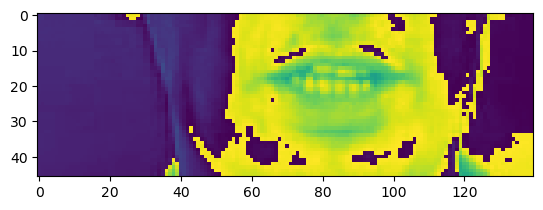

In [164]:
plt.imshow(frames[40])

In [165]:
alignments

<tf.Tensor: shape=(21,), dtype=int64, numpy=
array([ 2,  9, 14, 39,  2, 12, 21,  5, 39,  1, 20, 39, 12, 39, 19,  9, 24,
       39, 14, 15, 23])>

In [166]:
tf.strings.reduce_join([bytes.decode(x) for x in num_to_char(alignments.numpy()).numpy()])

<tf.Tensor: shape=(), dtype=string, numpy=b'bin blue at l six now'>

In [167]:
def mappable_function(path:str) ->List[str]:
    result = tf.py_function(load_data, [path], (tf.float32, tf.int64))
    return result

# 2. Create Data Pipeline

In [168]:
from matplotlib import pyplot as plt

In [169]:
data = tf.data.Dataset.list_files('./data/s1/*.mpg')
data = data.shuffle(500, reshuffle_each_iteration=False)
data = data.map(mappable_function)
data = data.padded_batch(2, padded_shapes=([75,None,None,None],[40]))
data = data.prefetch(tf.data.AUTOTUNE)
# Added for split 
train = data.take(450)
test = data.skip(450)

In [170]:
len(test)

50

In [171]:
frames, alignments = data.as_numpy_iterator().next()

In [172]:
len(frames)

2

In [173]:
sample = data.as_numpy_iterator()

In [174]:
val = sample.next(); val[0]

array([[[[[1.3942066 ],
          [1.3942066 ],
          [1.357517  ],
          ...,
          [0.47696543],
          [0.5870344 ],
          [9.172412  ]],

         [[1.3942066 ],
          [1.3942066 ],
          [1.357517  ],
          ...,
          [0.2201379 ],
          [0.03668965],
          [8.622067  ]],

         [[1.3942066 ],
          [1.3942066 ],
          [1.3942066 ],
          ...,
          [8.915585  ],
          [9.319171  ],
          [9.282481  ]],

         ...,

         [[0.9172412 ],
          [0.9172412 ],
          [0.9172412 ],
          ...,
          [0.11006895],
          [0.0733793 ],
          [0.        ]],

         [[0.9172412 ],
          [0.9172412 ],
          [0.9172412 ],
          ...,
          [9.319171  ],
          [9.282481  ],
          [9.245791  ]],

         [[0.9172412 ],
          [0.9172412 ],
          [0.9172412 ],
          ...,
          [9.355861  ],
          [9.245791  ],
          [9.172412  ]]],


        [[[1.3575

In [175]:
imageio.mimsave('./animation.gif', val[0][0], fps=10)

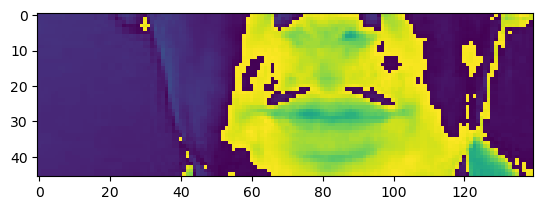

In [176]:
# 0:videos, 0: 1st video out of the batch,  0: return the first frame in the video 
plt.imshow(val[0][0][35])

In [177]:
tf.strings.reduce_join([num_to_char(word) for word in val[1][0]])

<tf.Tensor: shape=(), dtype=string, numpy=b'bin white with u two please'>

# 3. Design the Deep Neural Network

In [178]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv3D, LSTM, Dense, Dropout, Bidirectional, MaxPool3D, Activation, Reshape, SpatialDropout3D, BatchNormalization, TimeDistributed, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler

In [179]:
data.as_numpy_iterator().next()[0][0].shape

(75, 46, 140, 1)

In [180]:
model = Sequential()
model.add(Conv3D(128, 3, input_shape=(75,46,140,1), padding='same'))
model.add(Activation('relu'))
model.add(MaxPool3D((1,2,2)))

model.add(Conv3D(256, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPool3D((1,2,2)))

model.add(Conv3D(75, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPool3D((1,2,2)))

model.add(TimeDistributed(Flatten()))

model.add(Bidirectional(LSTM(128, kernel_initializer='Orthogonal', return_sequences=True)))
model.add(Dropout(.5))

model.add(Bidirectional(LSTM(128, kernel_initializer='Orthogonal', return_sequences=True)))
model.add(Dropout(.5))

model.add(Dense(char_to_num.vocabulary_size()+1, kernel_initializer='he_normal', activation='softmax'))

In [181]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d_9 (Conv3D)           (None, 75, 46, 140, 128)  3584      
                                                                 
 activation_9 (Activation)   (None, 75, 46, 140, 128)  0         
                                                                 
 max_pooling3d_9 (MaxPooling  (None, 75, 23, 70, 128)  0         
 3D)                                                             
                                                                 
 conv3d_10 (Conv3D)          (None, 75, 23, 70, 256)   884992    
                                                                 
 activation_10 (Activation)  (None, 75, 23, 70, 256)   0         
                                                                 
 max_pooling3d_10 (MaxPoolin  (None, 75, 11, 35, 256)  0         
 g3D)                                                 

In [182]:
5*17*75

6375

In [183]:
yhat = model.predict(val[0])

1/1 [==============================] - 2s 2s/step


In [184]:
tf.strings.reduce_join([num_to_char(x) for x in tf.argmax(yhat[0],axis=1)])

<tf.Tensor: shape=(), dtype=string, numpy=b'rr5555ppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppz'>

In [185]:
tf.strings.reduce_join([num_to_char(tf.argmax(x)) for x in yhat[0]])

<tf.Tensor: shape=(), dtype=string, numpy=b'rr5555ppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppz'>

In [186]:
model.input_shape

(None, 75, 46, 140, 1)

In [187]:
model.output_shape

(None, 75, 41)

# 4. Setup Training Options and Train

In [188]:
def scheduler(epoch, lr):
    if epoch < 30:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

In [189]:
def CTCLoss(y_true, y_pred):
    batch_len = tf.cast(tf.shape(y_true)[0], dtype="int64")
    input_length = tf.cast(tf.shape(y_pred)[1], dtype="int64")
    label_length = tf.cast(tf.shape(y_true)[1], dtype="int64")

    input_length = input_length * tf.ones(shape=(batch_len, 1), dtype="int64")
    label_length = label_length * tf.ones(shape=(batch_len, 1), dtype="int64")

    loss = tf.keras.backend.ctc_batch_cost(y_true, y_pred, input_length, label_length)
    return loss

In [190]:
class ProduceExample(tf.keras.callbacks.Callback): 
    def __init__(self, dataset) -> None: 
        self.dataset = dataset.as_numpy_iterator()
    
    def on_epoch_end(self, epoch, logs=None) -> None:
        data = self.dataset.next()
        yhat = self.model.predict(data[0])
        decoded = tf.keras.backend.ctc_decode(yhat, [75,75], greedy=False)[0][0].numpy()
        for x in range(len(yhat)):           
            print('Original:', tf.strings.reduce_join(num_to_char(data[1][x])).numpy().decode('utf-8'))
            print('Prediction:', tf.strings.reduce_join(num_to_char(decoded[x])).numpy().decode('utf-8'))
            print('~'*100)

In [191]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss=CTCLoss)

In [192]:
checkpoint_callback = ModelCheckpoint(os.path.join('models','checkpoint'), monitor='loss', save_weights_only=True) 

In [193]:
schedule_callback = LearningRateScheduler(scheduler)

In [194]:
example_callback = ProduceExample(test)

In [195]:
model.fit(train, validation_data=test, epochs=2, callbacks=[checkpoint_callback, schedule_callback, example_callback])

Epoch 1/2
291/450 [==================>...........] - ETA: 31:40 - loss: 76.8788

[mpeg1video @ 0x3b050a150] ac-tex damaged at 22 17
[mpeg1video @ 0x3b050a150] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 67.8628 

[mpeg1video @ 0x3acac2880] ac-tex damaged at 22 17
[mpeg1video @ 0x3acac2880] Warning MVs not available


1/1 [==============================] - 2s 2s/step
Original: place white with k five soon
Prediction: e e 
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: set white at u nine soon
Prediction: e e 
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 5762s 13s/step - loss: 67.8628 - val_loss: 93.3061 - lr: 1.0000e-04
Epoch 2/2
124/450 [=======>......................] - ETA: 1:00:49 - loss: 47.5391

[mpeg1video @ 0x3a3b83170] ac-tex damaged at 22 17
[mpeg1video @ 0x3a3b83170] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 44.7423 

[mpeg1video @ 0x3aa83f260] ac-tex damaged at 22 17
[mpeg1video @ 0x3aa83f260] Warning MVs not available
[mpeg1video @ 0x2d3d527d0] ac-tex damaged at 22 17
[mpeg1video @ 0x2d3d527d0] Warning MVs not available


1/1 [==============================] - 1s 1s/step
Original: lay red with f zero now
Prediction: e e e 
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: lay white with m zero now
Prediction: e e e 
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 5359s 12s/step - loss: 44.7423 - val_loss: 97.6913 - lr: 1.0000e-04


# 5. Make a Prediction 

In [196]:
url = 'https://drive.google.com/uc?id=1vWscXs4Vt0a_1IH1-ct2TCgXAZT-N3_Y'
output = 'checkpoints.zip'
gdown.download(url, output, quiet=False)
gdown.extractall('checkpoints.zip', 'models')

Downloading...
From (uriginal): https://drive.google.com/uc?id=1vWscXs4Vt0a_1IH1-ct2TCgXAZT-N3_Y
From (redirected): https://drive.google.com/uc?id=1vWscXs4Vt0a_1IH1-ct2TCgXAZT-N3_Y&confirm=t&uuid=e0c8a6d4-11f9-4464-85c4-90808da97bb4
To: /Users/htrap1211/Untitled Folder 1/LipNet/checkpoints.zip
100%|██████████████████████████████████████| 94.5M/94.5M [00:14<00:00, 6.36MB/s]


['models/checkpoint.index',
 'models/__MACOSX/._checkpoint.index',
 'models/checkpoint.data-00000-of-00001',
 'models/__MACOSX/._checkpoint.data-00000-of-00001',
 'models/checkpoint',
 'models/__MACOSX/._checkpoint']

In [197]:
model.load_weights('models/checkpoint')

In [198]:
test_data = test.as_numpy_iterator()

In [201]:
sample = test_data.next()

In [202]:
yhat = model.predict(sample[0])

1/1 [==============================] - 1s 1s/step


In [203]:
print('~'*100, 'REAL TEXT')
[tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in sample[1]]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ REAL TEXT


[<tf.Tensor: shape=(), dtype=string, numpy=b'bin green at t nine soon'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'lay green at z nine again'>]

In [204]:
decoded = tf.keras.backend.ctc_decode(yhat, input_length=[75,75], greedy=True)[0][0].numpy()

In [205]:
print('~'*100, 'PREDICTIONS')
[tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in decoded]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ PREDICTIONS


[<tf.Tensor: shape=(), dtype=string, numpy=b'bin green at t nine soon'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'lay green at z nine again'>]

# Test on a Video

In [207]:
sample = load_data(tf.convert_to_tensor('http://localhost:8888/edit/Untitled%20Folder%201/LipNet/data/s1/bbal6n.mpg'))

In [208]:
print('~'*100, 'REAL TEXT')
[tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in [sample[1]]]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ REAL TEXT


[<tf.Tensor: shape=(), dtype=string, numpy=b'bin blue at l six now'>]

In [209]:
yhat = model.predict(tf.expand_dims(sample[0], axis=0))

1/1 [==============================] - 1s 1s/step


In [210]:
decoded = tf.keras.backend.ctc_decode(yhat, input_length=[75], greedy=True)[0][0].numpy()

In [211]:
print('~'*100, 'PREDICTIONS')
[tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in decoded]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ PREDICTIONS


[<tf.Tensor: shape=(), dtype=string, numpy=b'bin blue at l six now'>]